# Getting Genres from Spotify using Spotipy

In [9]:
from nltk import FreqDist #Importing natural language toolkit (nltk) to create word frequency distribution
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [11]:

client_id = "61fc722b270143c39a95b0d83113b103"
client_secret = "a1b6d905ef364a4b9bd662f136c0892f"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

file= "2012_top_tracks.csv"
file2= "Global_top_100"
# I found top 100 for 2017 csv on kaggle
top100_12 = pd.read_csv(file)

# result = sp.search('Thriller',type='track')
# pprint.pprint(result)

top100_12.head()

,№,Title,Artist(s)
0,1,"""Somebody That I Used to Know""",Gotye featuring Kimbra
1,2,"""Call Me Maybe""",Carly Rae Jepsen
2,3,"""We Are Young""",Fun featuring Janelle Monáe
3,4,"""Payphone""",Maroon 5 featuring Wiz Khalifa
4,5,"""Lights""",Ellie Goulding


In [12]:
url = "https://api.spotify.com/v1/recommendations/available-genre-seeds"
client_id = "61fc722b270143c39a95b0d83113b103"
client_secret = "a1b6d905ef364a4b9bd662f136c0892f" 

In [13]:
songs = []
genres = []
for song in range(0,len(top100_12['Artist(s)'])):
    
    #I put this in a try just in case the search result yields an error..or any api request yields an error
    try:
        # I search the song name and artist using spotipy, then I limit the number of search results to 1
         track = sp.search(top100_12['Title'][song] + ' ' + top100_12['Artist(s)'][song],limit=1)
            
            # Here I am parsing the json return to get the artists' id so I can look up the artist
         track_id = track['tracks']['items'][0]['artists'][0]['id']
        # This gets the artists' spotify profile, which includes the genres reflected in their music
         artist = sp.artist(track_id)
         genres.append(artist['genres'])
    except:
        genres.append('n/a')

retrying ...1secs


In [14]:
len(genres)

100

In [18]:
top100_12['genre'] = genres
top100_12.head()

,№,Title,Artist(s),genre
0,1,"""Somebody That I Used to Know""",Gotye featuring Kimbra,n/a
1,2,"""Call Me Maybe""",Carly Rae Jepsen,"[canadian pop, dance pop, electropop, indie po..."
2,3,"""We Are Young""",Fun featuring Janelle Monáe,n/a
3,4,"""Payphone""",Maroon 5 featuring Wiz Khalifa,n/a
4,5,"""Lights""",Ellie Goulding,"[dance pop, edm, electropop, metropopolis, pop..."


In [19]:
allGenres = []
for gen in top100_12['genre']:
    if gen != 'n/a':
        for b in gen:
            allGenres.append(b)
len(allGenres)

330

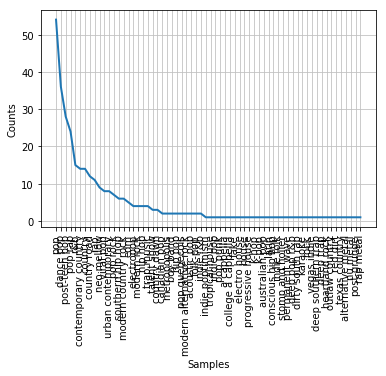

<Figure size 432x288 with 0 Axes>

In [22]:
# #I use FreqDist to automatically count the number of times a certain word, in this case genre, appears in the list
genreDist = FreqDist(allGenres)

#This is a plot of the frequency distribution. I believe there is much work to be done in terms of visualization
# but I believe this is a start
genreDist.plot()
plt.tight_layout()
plt.savefig("FreqDist_allGenres.png")

In [23]:
df = pd.DataFrame.from_dict(genreDist, orient='index')

genres = df.rename_axis('Genres').reset_index()\
 .assign(length = df.index.str.len()).rename(columns={0:'Genre Count'})

del genres["length"]
genres


# sort the values by largest to smallest
genres.sort_values(by="Genre Count", ascending=False)
genres.set_index("Genres")

,Genre Count
Genres,
canadian pop,2
dance pop,36
electropop,4
indie poptimism,1
pop,54
post-teen pop,28
viral pop,8
edm,5
metropopolis,2


In [25]:
df = pd.DataFrame.from_dict(genreDist, orient='index')
genre_count = df.rename_axis('Genres').reset_index().rename(columns={0:'Count'})

In [26]:

genre_count = genre_count.sort_values(by="Count", ascending=False)
genre_count.head()

,Genres,Count
4,pop,54
1,dance pop,36
5,post-teen pop,28
16,pop rap,24
9,r&b,15


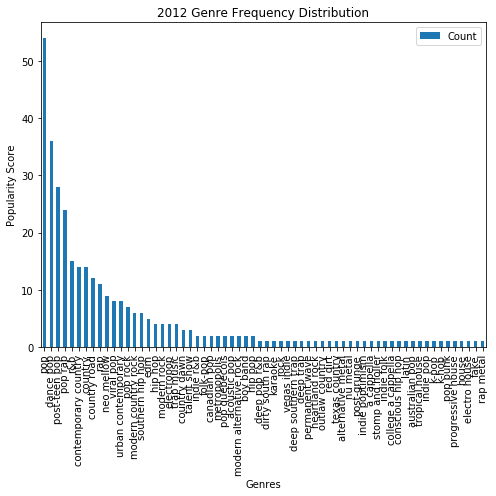

In [27]:
genre_count = genre_count.set_index('Genres')
genre_count.plot(kind='bar', figsize=(7,7), )

genre_count = genre_count.reset_index()
plt.title('2012 Genre Frequency Distribution')
plt.xlabel('Genres')
plt.ylabel('Popularity Score')
plt.tight_layout()
plt.savefig("freqDist2012.png")

In [116]:
genreDist = FreqDist(allGenres)
genreDist

FreqDist({'pop': 55, 'dance pop': 38, 'post-teen pop': 28, 'pop rap': 24, 'r&b': 15, 'contemporary country': 14, 'country': 14, 'country road': 12, 'rap': 11, 'neo mellow': 9, ...})

In [127]:
df = pd.DataFrame.from_dict(genreDist, orient='index')

genre_count = df.rename_axis('Product Id').reset_index().rename(columns={0:'Count'})

In [142]:
genre_count = genre_count.sort_values(by="Count", ascending=False)
genre_count.head()

,Product Id,Count
4,pop,55
1,dance pop,38
5,post-teen pop,28
16,pop rap,24
9,r&b,15


In [143]:
popCount = 0
rapCount = 0
edmCount = 0
countryCount=0
otherCount = 0
for genre in allGenres:
   if 'pop' in genre:
       popCount = popCount + 1
   elif('rap' or 'hip hop' or 'trap') in genre:
       rapCount = rapCount + 1
   elif('edm' or 'electro' or 'techno' or 'tropical') in genre:
       edmCount = edmCount + 1
   else:
       otherCount = otherCount + 1

condensedGenre = ['Pop','Rap/Hip-Hop','EDM','Other']
summarizedGenres = pd.DataFrame({"Music Genres":condensedGenre, "Genre Count":[popCount,rapCount,edmCount,otherCount]})
summarizedGenres

,Music Genres,Genre Count
0,Pop,181
1,Rap/Hip-Hop,19
2,EDM,5
3,Other,128


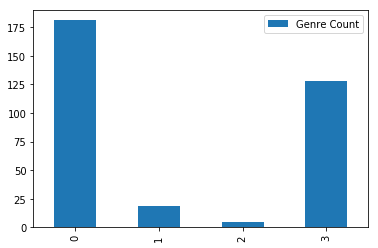

In [119]:
index = ['Pop', 'Rap/Hip-Hop', 'EDM']
summarizedGenres.plot(kind='bar', stacked=True)

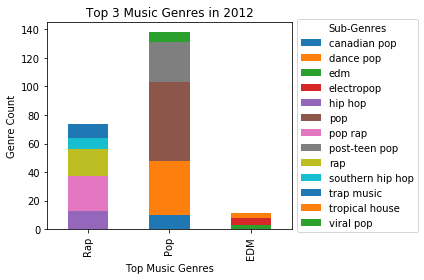

In [144]:
data = pd.DataFrame([
        ('Pop','pop', 55),
        ('Pop','dance pop', 38),
        ('Pop','post-teen pop', 28),
        ('Pop','canadian pop', 10),
        ('Pop','viral pop', 7),
        ('Rap','rap', 19),
        ('Rap','pop rap', 24),
        ('Rap','hip hop', 13),
        ('Rap','trap music', 10),
        ('Rap','southern hip hop', 8),
        ('EDM','electropop', 5),
        ('EDM','edm', 3),
        ('EDM','tropical house', 3),
    ], 
    columns=['Top Music Genres', 'Sub-Genres', 'value']
)
data = data.set_index(['Top Music Genres', 'Sub-Genres']).value

data.unstack().sort_index(ascending=False).plot(kind='bar', stacked=True)
plt.title("Top 3 Music Genres in 2012")
plt.legend(title="Sub-Genres",loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Genre Count")
plt.tight_layout()
# data.sort_index(ascending=False)
plt.savefig("stackedbar2012.png")

In [141]:
popCount = 0
rapCount = 0
edmCount = 0
misCount = 0
for genre in allGenres:
    if 'pop' in genre:
        popCount = popCount + 1
    elif('rap' or 'hip hop' or 'trap') in genre:
        rapCount = rapCount + 1
    elif('edm' or 'electro' or 'techno') in genre:
        edmCount = edmCount + 1
    else:
        misCount = misCount + 1

condensedGenre = ['Pop','Rap/Hip-Hop','EDM','Misc.']
summarizedGenres = pd.DataFrame({"Genre":condensedGenre, "Count":[popCount,rapCount,edmCount,misCount]})
summarizedGenres

,Genre,Count
0,Pop,181
1,Rap/Hip-Hop,19
2,EDM,5
3,Misc.,128


In [136]:
popCount

181

In [137]:
rapCount

19